In [1]:
import os
import imageio
import numpy as np
import keras
import pandas as pd
from sklearn.model_selection import  train_test_split
from skimage.feature import hog
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from keras.layers import Conv2D, MaxPooling2D


In [2]:
##Loading the data into numpy arrays
data = []
labels = []

num_classes = 43

for i in range(num_classes):
    training_directory = './MyData/' + str(i) + '/'
    for filename in os.listdir(training_directory):
        if (filename.endswith('.png')):
            image = imageio.imread(training_directory + filename)

            #Populating arrays
            data.append(np.array(image))
            labels.append(i)
    print(str(i), end=' ')

## Force it to be np.array
data = np.array(data)
labels = np.array(labels)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

In [3]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
def one_hot_to_label(one_hot):
     return np.argmax(one_hot)

In [7]:
classes = pd.read_csv('./labels.csv')
classes = np.array(classes)

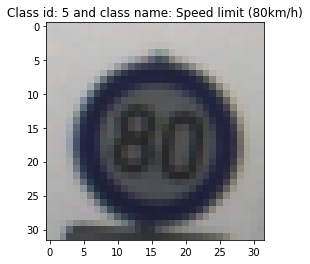

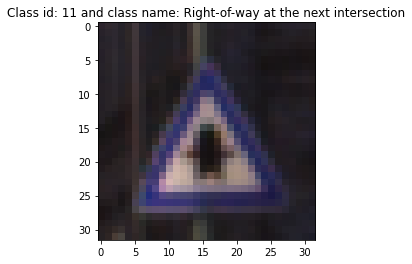

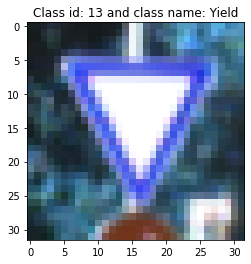

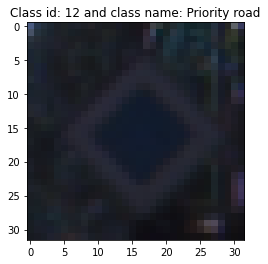

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

for i in range(4):
    label = one_hot_to_label(y_train[i])
    plt.figure()
    plt.title("Class id: "+ str(label)+ " and class name: " + classes[label][1])
    plt.imshow(x_train[i])

In [9]:
#Model 1

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

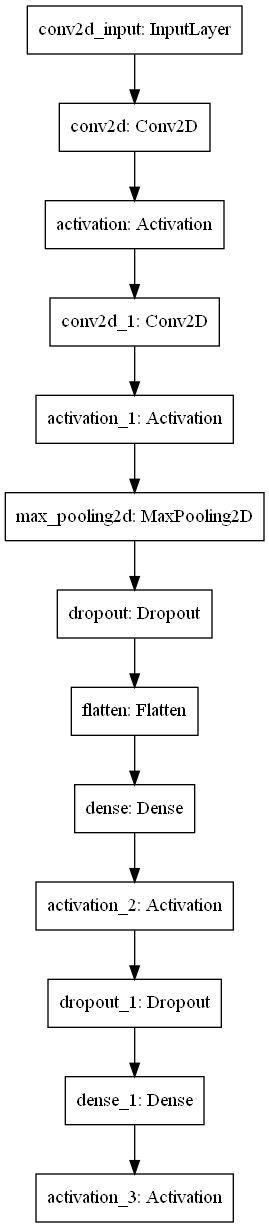

In [11]:
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot

Image(model_to_dot(model).create(prog='dot', format='png'))

In [18]:
batch_size = 128
epochs = 30

history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/30
191/191 [==============================] - 28s 144ms/step - loss: 0.1327 - accuracy: 0.9619 - val_loss: 0.0605 - val_accuracy: 0.9875
Epoch 2/30
191/191 [==============================] - 29s 151ms/step - loss: 0.0993 - accuracy: 0.9707 - val_loss: 0.0546 - val_accuracy: 0.9893
Epoch 3/30
191/191 [==============================] - 28s 144ms/step - loss: 0.0804 - accuracy: 0.9754 - val_loss: 0.0460 - val_accuracy: 0.9892
Epoch 4/30
191/191 [==============================] - 28s 145ms/step - loss: 0.0616 - accuracy: 0.9814 - val_loss: 0.0473 - val_accuracy: 0.9896
Epoch 5/30
191/191 [==============================] - 27s 140ms/step - loss: 0.0525 - accuracy: 0.9843 - val_loss: 0.0393 - val_accuracy: 0.9905
Epoch 6/30
191/191 [==============================] - 27s 140ms/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 0.0321 - val_accuracy: 0.9919
Epoch 7/30
191/191 [==============================] - 27s 139ms/step - loss: 0.0402 - accuracy: 0.9881 - val_loss: 0.0317 - val_ac

In [14]:
model.save('k_model.h5')

In [15]:
import numpy as np
from numpy import argmax

y_pred = model.predict(x_test)
test = y_pred.round()

results = []

for x in range(len(test)):
  results.append([np.argmax(test[x])])

<ipython-input-16-479802379aa7>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


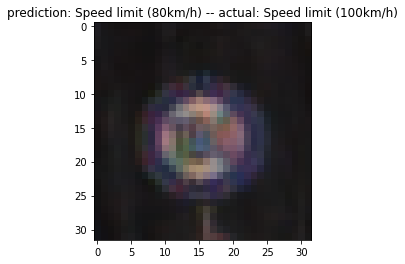

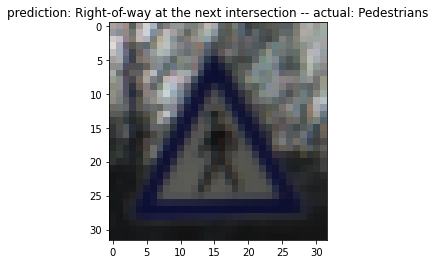

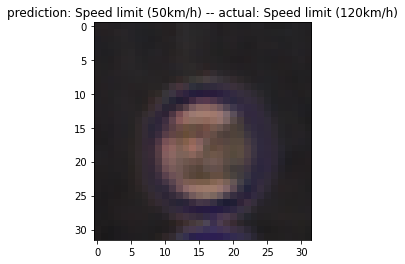

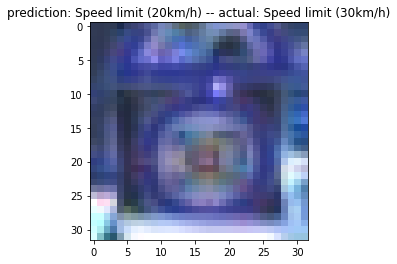

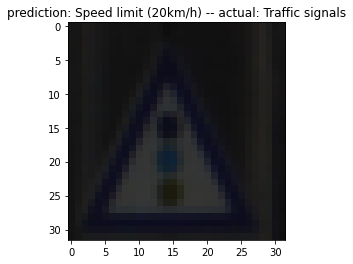

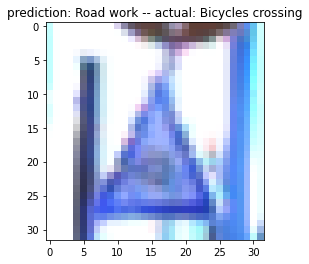

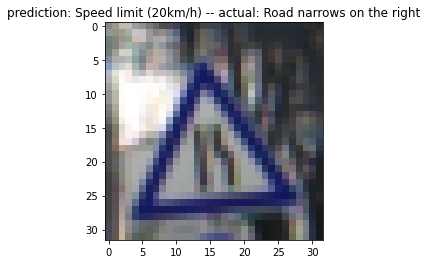

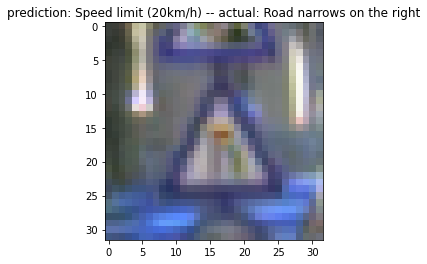

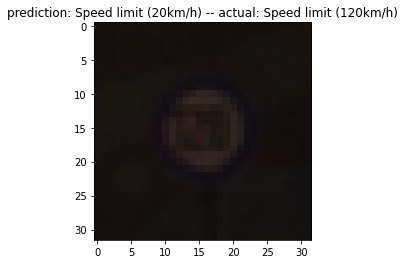

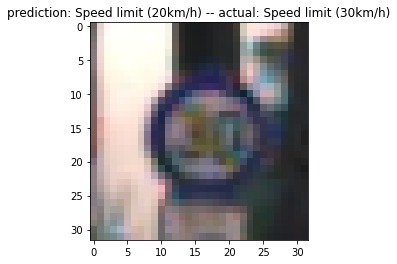

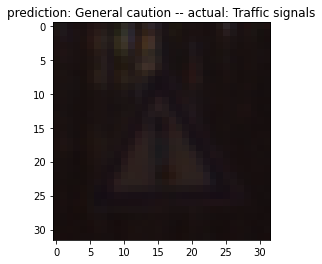

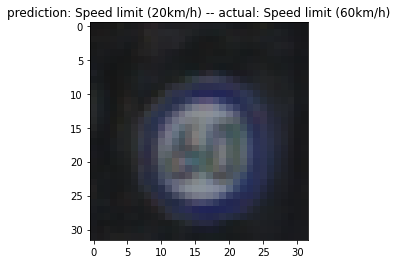

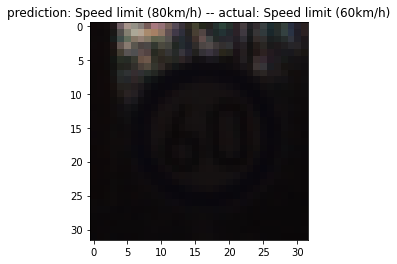

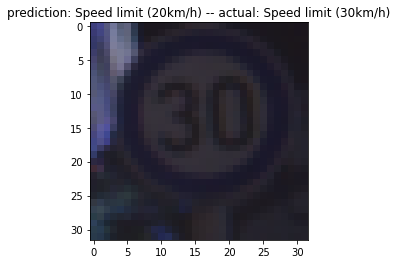

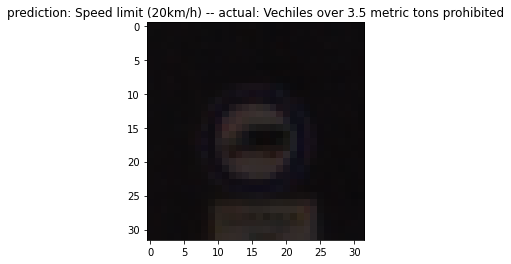

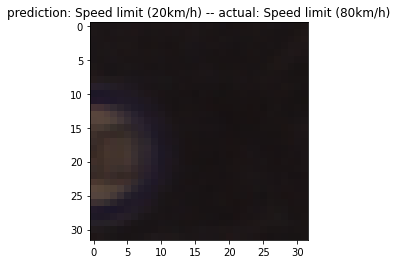

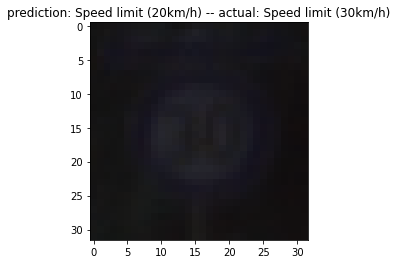

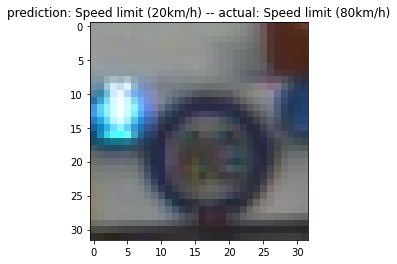

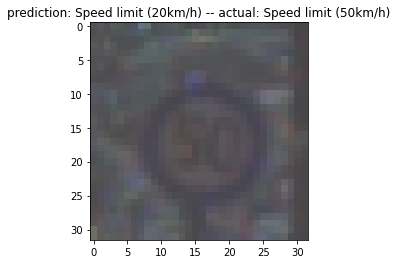

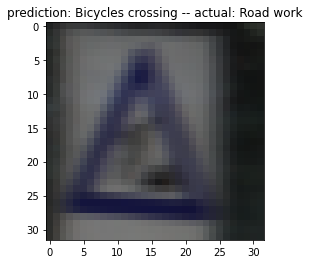

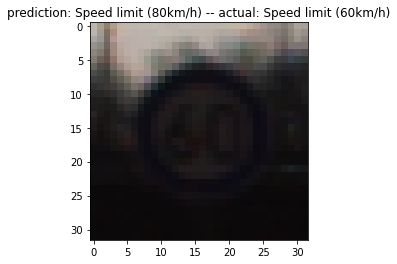

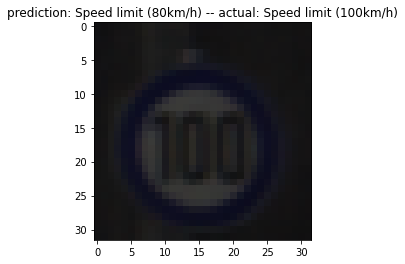

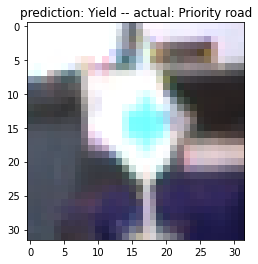

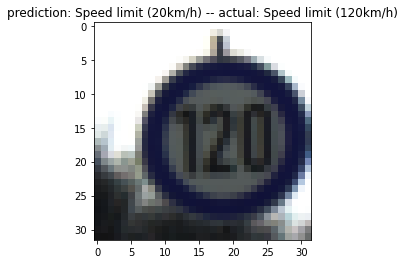

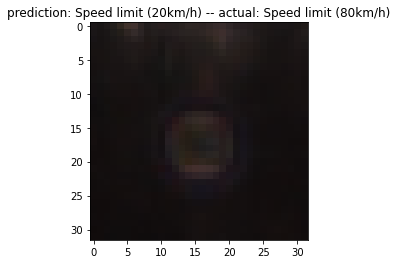

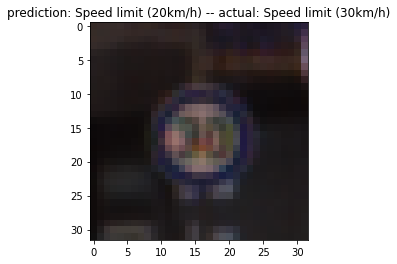

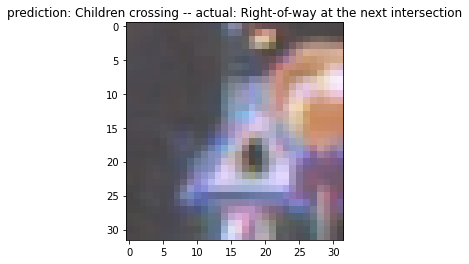

In [16]:
#Small test to visualise the model's incorrect guesses
#This may indicate what it finds difficult & where it struggles
for i in range(1000):
    pred = np.argmax(test[i])
    ans = np.argmax(y_test[i])
    
    if (pred != ans):
        plt.figure()
        plt.title("prediction: " + classes[pred][1] + " -- actual: " + classes[ans][1])
        plt.imshow(x_test[i])

In [17]:
# These show the model doesnt improve much beyond ~10 epochs

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
# Trying out a similar model from paper [5]
# I don't think this is as good - just for comparison

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(32, (3, 3), padding='valid', input_shape=x_train.shape[1:]))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model2.summary()

In [ ]:
batch_size = 128
epochs = 20

history2 = model2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)